# Introduction

## What is the goal?

1. I want to predict the final price of each home (= Regression)
2. I have to use feature engineering techniques explained in class to transform the dataset

In [1]:
# libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
%qtconsole

pd.set_option("max_columns", None)

# Data Reading and Preparation

In [2]:
# load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# check there is only one row for each id
len(np.unique(train.Id)) == len(train)

True

In [4]:
# there are no duplicates so remove id column from training data
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

## Hunting NAs

In [5]:
# check null values
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
print("There are {} columns with missing values.".format(len(train.isnull().sum()[train.isnull().sum() > 0])))

There are 19 columns with missing values.


In [7]:
# loop to fill in NAs in categorical variables with 'No'
# assume NA values in categorical variables means no feature available = 'None'
# except Electrical

non_numeric_cols = []
for i in train.columns:
    if train[i].dtype == object:
        non_numeric_cols.append(i)
        
# fill in electrical first
train.Electrical = train.Electrical.fillna('UNK')
test.Electrical = test.Electrical.fillna('UNK')

# update every other categorical values
train.update(train[non_numeric_cols].fillna('No'))
test.update(test[non_numeric_cols].fillna('No'))

In [100]:
# LotFrontage: NA means no lot frontage = 0
train.LotFrontage = train.LotFrontage.fillna(0)
test.LotFrontage = test.LotFrontage.fillna(0)

In [101]:
# Masvnrarea: NA means 0
train.MasVnrArea = train.MasVnrArea.fillna(0)
test.MasVnrArea = test.MasVnrArea.fillna(0)

In [102]:
# Grageyrblt: assume most garages built when houses built
train.loc[train.GarageYrBlt.isnull(),'GarageYrBlt'] = train.YearBuilt
test.loc[test.GarageYrBlt.isnull(),'GarageYrBlt'] = test.YearBuilt

In [103]:
# other null test data?

In [104]:
train.isnull().sum()[train.isnull().sum() > 0]
test.isnull().sum()[test.isnull().sum() > 0]

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

## Factorize features

Some numerical features are actually really categories

In [105]:
train.MSSubClass = train.MSSubClass.astype('str')
test.MSSubClass = test.MSSubClass.astype('str')

In [106]:
train.MoSold = train.MoSold.astype('str')
test.MoSold = test.MoSold.astype('str')

## Skewness

There is skewness in the target variable

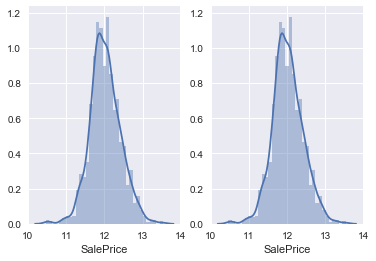

In [107]:
# log transformation
# why log(x+1)?
# log cannot be taken if the value is 0 - it's just a precautious action I guess
# source: http://onbiostatistics.blogspot.com.es/2012/05/logx1-data-transformation.html
# source: https://www.stata.com/statalist/archive/2008-04/msg00246.html

train.SalePrice.describe()
fig, ax = plt.subplots(1,2)
sns.distplot(np.log(train.SalePrice),
            ax = ax[0])
sns.distplot(np.log(train.SalePrice+ 1),
            ax = ax[1])

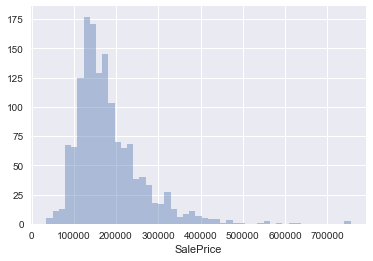

In [108]:
sns.distplot(train.SalePrice, kde = False)

In [109]:
train['SalePrice'] = train['SalePrice'].apply(lambda x: np.log(x+1))

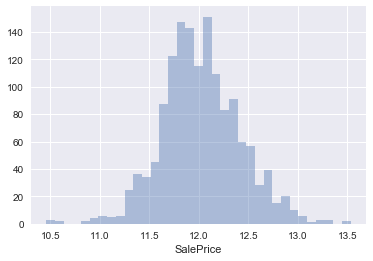

In [110]:
sns.distplot(train.SalePrice, kde = False)

In [111]:
# change other values to skewness
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        numeric_cols.append(i)

len(numeric_cols)

35

In [112]:
# using pandas skew function
# (train.skew(numeric_only = True ) > 0.75).iteritems()

In [113]:
# skew_features_transform = skew_features[abs(skew_features) > 0.75].index

# for i in skew_features:
    features[i] = features[i].apply(lambda x: np.log1p(x))

IndentationError: unexpected indent (<ipython-input-113-57bc7f899ca7>, line 4)

In [ ]:
# train.columns.is_numeric

In [ ]:
# ss = train[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending = False)

In [ ]:
# pd.DataFrame({skew: ss})

In [ ]:
# skew_features_transform = skew_features[abs(skew_features) > 0.75].index

# for i in skew_features:
    # features[i] = features[i].apply(lambda x: np.log1p(x))

In [ ]:
'''s_transform = ss[abs(ss) > 0.75].index'''

In [ ]:
'''for i in s_transform:
    train[i] = train[i].apply(lambda x: np.log1p(x))'''

In [116]:
# measure skewness with scipy skew
from scipy.stats import skew
from scipy.stats import boxcox

# before skewness
for i in numeric_cols:
    print(i, skew(train[i]))

LotFrontage 0.26754714932471685
LotArea 12.195142125084478
OverallQual 0.2167209765258641
OverallCond 0.6923552135520978
YearBuilt -0.612830724202899
YearRemodAdd -0.5030444967597948
MasVnrArea 2.6748646898037354
BsmtFinSF1 1.6837708962341815
BsmtFinSF2 4.250888017057445
BsmtUnfSF 0.9193227015582005
TotalBsmtSF 1.522688086978629
1stFlrSF 1.3753417421837937
2ndFlrSF 0.8121942731961613
LowQualFinSF 9.002080417658552
GrLivArea 1.365155954773434
BsmtFullBath 0.5954540376067279
BsmtHalfBath 4.0991856695420035
FullBath 0.0365239844325461
HalfBath 0.6752028347742616
BedroomAbvGr 0.21157244158228097
KitchenAbvGr 4.483784093860484
TotRmsAbvGrd 0.6756457673102017
Fireplaces 0.6488976310170327
GarageYrBlt -0.693615411226019
GarageCars -0.34219689543081294
GarageArea 0.1797959420587727
WoodDeckSF 1.5397916998042025
OpenPorchSF 2.361911928568972
EnclosedPorch 3.086696471376678
3SsnPorch 10.293752357165413
ScreenPorch 4.1179773827954875
PoolArea 14.813134660429398
MiscVal 24.4516396173223
YrSold 0.0

In [ ]:

'''for i in numeric_cols:
    if abs(skew(train[i])) > 0.75:
        train[i] = train[i].apply(lambda x: np.log(x+1))'''

In [ ]:
# same for test data
'''for i in numeric_cols:
    if i == 'SalePrice':
        pass
    else: 
        if abs(skew(test[i])) > 0.75:
            test[i] = test[i].apply(lambda x: np.log(x+1))'''

In [119]:
sample = train.LotArea

In [120]:
boxcox(sample)

(array([ 10.43368   ,  10.60280927,  10.81397325, ...,  10.52335162,
         10.61890088,  10.64865655]), 0.030946318971935564)

In [123]:
# try box cox transformation instead
for i in numeric_cols:
    if abs(skew(train[i])) > 0.75:
        train[i] = boxcox(train[i])[0]

ValueError: Data must be positive.

In [86]:
# after skew transformation
for i in numeric_cols:
    print(i, skew(train[i]))

LotFrontage 0.26754714932471685
LotArea -0.13726327193353463
OverallQual 0.2167209765258641
OverallCond 0.6923552135520978
YearBuilt -0.612830724202899
YearRemodAdd -0.5030444967597948
MasVnrArea 0.5030142428849528
BsmtFinSF1 -0.6177742838938641
BsmtFinSF2 2.521100187789297
BsmtUnfSF -2.18425653050519
TotalBsmtSF -5.149372577588974
1stFlrSF 0.08003175718429047
2ndFlrSF 0.28934579420210166
LowQualFinSF 7.452649617407249
GrLivArea -0.006133943205449232
BsmtFullBath 0.5954540376067279
BsmtHalfBath 3.929021552020634
FullBath 0.0365239844325461
HalfBath 0.6752028347742616
BedroomAbvGr 0.21157244158228097
KitchenAbvGr 3.865437143533283
TotRmsAbvGrd 0.6756457673102017
Fireplaces 0.6488976310170327
GarageYrBlt -0.693615411226019
GarageCars -0.34219689543081294
GarageArea 0.1797959420587727
WoodDeckSF 0.15337880209736926
OpenPorchSF -0.023373249677216844
EnclosedPorch 2.110104183261533
3SsnPorch 7.727025709215359
ScreenPorch 3.1471712168455683
PoolArea 14.348341634226733
MiscVal 5.1653899778783

In [89]:
still_skewed =[]
for i in numeric_cols:
    if abs(skew(train[i])) > 0.75:
        still_skewed.append(i)
still_skewed

['BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

count    1460.000000
mean        0.655398
std         1.845045
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.296413
Name: BsmtFinSF2, dtype: float64

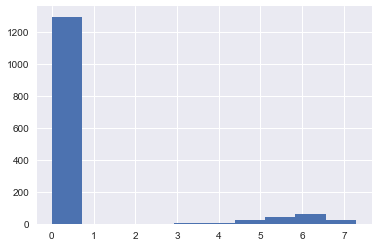

In [92]:
plt.hist(train.BsmtFinSF2)
train.BsmtFinSF2.describe()

# Train, Validaition Splitting

We are going to split the annotated dataset in training and validation for the later evaluation of our regression models



In [46]:
# Split data into training and validation dataset

# using numpy
msk = np.random.rand(len(train)) < 0.8
training = train[msk]
validation = train[~msk]

In [47]:
print("training: {}\nvalidation: {}\ntest: {}".format(len(training), len(validation), len(test)))

training: 1184
validation: 276
test: 1459


In [48]:
print("training: {}".format(len(training.columns)))
print("training: {}".format(len(validation.columns)))
print("training: {}".format(len(test.columns)))

training: 80
training: 80
training: 79


If we inspect in detail the categorical variables of the dataset, we’ll see that some are incomplete: they only have a unique value for all the dataset. These features are not valuable. Remember the three aspects that a feature should have: informative, **discriminative** and independent. Incomplete cases are not discriminative at all. In addition, this might create problems when fitting the regression model.

In [51]:
# training set incomplete cases
# find cases where there are only 1 unique value

for i in non_numeric_cols:
    unique_num = len(np.unique(training[i]))
    if unique_num < 2:
        print(i)

Utilities


In [52]:
# validation set incomplete cases
for i in non_numeric_cols:
    unique_num = len(np.unique(validation[i]))
    if unique_num < 2:
        print(i)

In [53]:
# test set incomplete cases
for i in non_numeric_cols:
    unique_num = len(np.unique(test[i]))
    if unique_num < 2:
        print(i)

In [54]:
# remove utilities with only 1 unique value = adds no value to
# analysis

training = training.drop('Utilities', axis = 1)
validation = validation.drop('Utilities', axis = 1)
test = test.drop("Utilities", axis = 1)

In [55]:
# remove utiltities from column names
non_numeric_cols.remove('Utilities')

# Feature Engineering

## Filtering methods

We will rank the features according to their predictive power according to the methodologies seen in class: the Chi Squared Independence test and the Information Gain.

### Full Model

lm model with all the features to have a baseline to evaluate the impact of the feature engineering.

In [95]:
# for python, categorical variables need to be changed to numeric variables
# use pandas get dummies function to change them to binary variables

In [56]:
# create dummy and concat with original dataframe (Without columns)

train_dummy = pd.get_dummies(training[non_numeric_cols])
training.drop(non_numeric_cols, axis = 1)

training = pd.concat([training,train_dummy], axis = 1)

In [57]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184 entries, 0 to 1459
Columns: 335 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(24), int64(11), object(44), uint8(256)
memory usage: 1.0+ MB


In [58]:
# repeat dummification process with validation and testing data

# validation data
validation_dummy = pd.get_dummies(validation[non_numeric_cols])
validation.drop(non_numeric_cols, axis = 1)

validation = pd.concat([validation, validation_dummy], axis = 1)

# test data
test_dummy = pd.get_dummies(test[non_numeric_cols])
test.drop(non_numeric_cols, axis = 1)

test = pd.concat([test, test_dummy], axis = 1)

In [59]:
# verify changes
print(validation.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 4 to 1457
Columns: 317 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(24), int64(11), object(44), uint8(238)
memory usage: 236.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 331 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(23), object(44), uint8(253)
memory usage: 1.2+ MB
None


In [37]:
# set seed
np.random.seed(121)

In [42]:
# identify predictor variables and target variable
features = list(training.columns)
features.remove('SalePrice')
target = 'SalePrice'

In [43]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm.fit(training[numeric_cols], training.SalePrice)
pred = lm.predict(validation[numeric_cols])

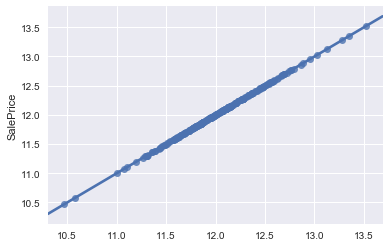

In [41]:
sns.regplot(pred, validation.SalePrice)